## Project 2 D
#### Madison Baxter Python Group 8

#### First import all packages needed

In [1]:
import numpy as np
import pandas as pd
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio import pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
import pylab
import logomaker

Matplotlib is building the font cache; this may take a moment.


### 1. Pairwise Sequence Alignment Between APOE Gene (Exon 4) in Humans vs Mice
#### Here is a pairwise sequence alignment between Exon 4 of the APOE Gene in humans and Exon 4 of the APOE Gene in mice. The sequences are downloaded from NCBI into files APOE_homo_sapiens (human) and APOE_mus_musculus (mouse). The purpose of this alignment is to show that the sequence of APOE is similar in both species in the region where the SNP in humans occurs that causes Alzheimer's in humans.

In [2]:
APOE_homo_sapiens = SeqIO.read("APOE_homo_sapiens_exon4.txt", "fasta")
print(APOE_homo_sapiens)
APOE_homo_sapiens_seq = APOE_homo_sapiens.seq
print(APOE_homo_sapiens_seq)

APOE_mus_musculus = SeqIO.read("APOE_mus_musculus_exon4.txt", "fasta")
print(APOE_mus_musculus)
APOE_mus_musculus_seq = APOE_mus_musculus.seq
print(APOE_mus_musculus_seq)

alignments = pairwise2.align.globalxx(APOE_homo_sapiens_seq, APOE_mus_musculus_seq)

for alignment in alignments:
    print(format_alignment(*alignment))

ID: ref|NM_000041.4|:306-1166
Name: ref|NM_000041.4|:306-1166
Description: ref|NM_000041.4|:306-1166 Homo sapiens apolipoprotein E (APOE), transcript variant 2, mRNA
Number of features: 0
Seq('GGCGCTGATGGACGAGACCATGAAGGAGTTGAAGGCCTACAAATCGGAACTGGA...GCA')
GGCGCTGATGGACGAGACCATGAAGGAGTTGAAGGCCTACAAATCGGAACTGGAGGAACAACTGACCCCGGTGGCGGAGGAGACGCGGGCACGGCTGTCCAAGGAGCTGCAGGCGGCGCAGGCCCGGCTGGGCGCGGACATGGAGGACGTGTGCGGCCGCCTGGTGCAGTACCGCGGCGAGGTGCAGGCCATGCTCGGCCAGAGCACCGAGGAGCTGCGGGTGCGCCTCGCCTCCCACCTGCGCAAGCTGCGTAAGCGGCTCCTCCGCGATGCCGATGACCTGCAGAAGCGCCTGGCAGTGTACCAGGCCGGGGCCCGCGAGGGCGCCGAGCGCGGCCTCAGCGCCATCCGCGAGCGCCTGGGGCCCCTGGTGGAACAGGGCCGCGTGCGGGCCGCCACTGTGGGCTCCCTGGCCGGCCAGCCGCTACAGGAGCGGGCCCAGGCCTGGGGCGAGCGGCTGCGCGCGCGGATGGAGGAGATGGGCAGCCGGACCCGCGACCGCCTGGACGAGGTGAAGGAGCAGGTGGCGGAGGTGCGCGCCAAGCTGGAGGAGCAGGCCCAGCAGATACGCCTGCAGGCCGAGGCCTTCCAGGCCCGCCTCAAGAGCTGGTTCGAGCCCCTGGTGGAAGACATGCAGCGCCAGTGGGCCGGGCTGGTGGAGAAGGTGCAGGCTGCCGTGGGCACCAGCGCCGCCCCTGTGCCCAGCGACAATCACTGAACGCCGAAGCCTGCAGCCATGCGACC

In [3]:
# Setting the window size and which sequence is on the x and y axes of the dot plot
window = 3
seq_one = str(APOE_homo_sapiens_seq)
seq_two = str(APOE_mus_musculus_seq)

# Saving the data in the dot plot based on window size and comparing for all I and all j in the range of the lengths of the
# sequences, wheter or not there is an alignment.

data = [
    [
        (seq_one[i : i + window] != seq_two[j: j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]

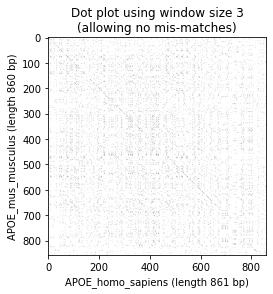

In [4]:
pylab.gray()
pylab.imshow(data)
pylab.xlabel("APOE_homo_sapiens (length %i bp)" % (len(APOE_homo_sapiens_seq)))
pylab.ylabel("APOE_mus_musculus (length %i bp)" % (len(APOE_mus_musculus_seq)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

#### To visualize the pairwise sequence alignment, I have created a dot plot to show the similarity of residues in both sequences. The x-axis is the APOE Exon4 sequence in humans, and the y-axis is the APOE Exon4 sequence in mice. Everywhere the sequences are similar is marked with black. Everywhere the sequences are dissimilar is marked with white. Here we see a clear diagonal line running from the start to the end of the sequences, showing that from the pairwise sequence alignment, the sequences are similar.

### 2. Multiple Sequence Alignment for Apolipoprotein E in multiple species
#### Below is a multiple sequence alignment for Apolipoprotein E, the protein encoded by APOE gene, between humans, dog, cow, mouse, rat, and frog. The Apoliprotein E sequences were downloaded from NCBI, cut to only include the 20 residues surrounding where the SNP responsible for APOE4 is located, and placed into a single file, 'ApolipoproteinE_snp.fasta'. Good alignments between species for this region of the protein should support that the function/structure of the protein is evolutionarily conserved, and that APOE gene, which encodes the protein, has a conserved function across species. Therefore, a mutation occuring in one species should have a similar effect across species.

In [5]:
def getSeqsFromFile(file_contents):
    # each sequence starts with >, so split by that to seperate them
    seq_delimeter = ">"
    raw_seqs = file_contents.split(seq_delimeter)
    
    # skip first empty element in the list
    raw_seqs = raw_seqs[1:]

    seqs = []
    # extract the actual sequence contents from each raw_seq
    for raw_seq in raw_seqs:
        # marks position of end of header
        first_newline = raw_seq.find("\n")
        # sequence starts at end of header, and trim trailing whitespace
        seq = raw_seq[first_newline+1:].strip()
        seqs.append(seq)

    return seqs

In [6]:
file = open('ApolipoproteinE_snp.fasta')
file_contents = file.read()
file.close()

seqs = getSeqsFromFile(file_contents)

In [7]:
# Creates multiple sequence alignment object (not being used)
seq_records = [SeqRecord(Seq(seq), id=str(i)) for i, seq in enumerate(seqs)]
align = MultipleSeqAlignment(seq_records)
print(align)

Alignment with 7 rows and 20 columns
RLGADMEDVCGRLVQYRGEV 0
RLGADMEDVRGRLVQYRGEV 1
RLRSDMEDVRNRLTQYRGEL 2
RLGSDMEDLRNRLAQYRSEV 3
RLGADMEDLRNRLGQYRNEV 4
RLGADMEDLRNRLGQYRNEV 5
KLKSDMEDTKNKAIQYSGDL 6


In [8]:
def createProbabilityMatrix(seqs):
    # possible nucleotides appearing across all sequences
    nucleotides = list(set(list("".join(seqs))))
    
    # length of each sequence
    positions = list(range(len(seqs[0])))
    
    # initialize probabilities to 0
    df = pd.DataFrame(0.0, index=positions, columns=nucleotides)

    # loop through each sequence position
    for pos in range(len(seqs[0])):
        # determine the count of each nucleotide at this position
        counts = {}
        for seq in seqs:
            nucleotide = seq[pos]
            if nucleotide in counts:
                counts[nucleotide] += 1
            else:
                counts[nucleotide] = 1
        
        # calculate the probablity and update matrix
        for nucleotide in counts:
            prob = counts[nucleotide] / len(seqs)
            df.iloc[pos][nucleotide] = prob

    # return probability matrix
    return df

Text(0, 0.5, 'Probability')

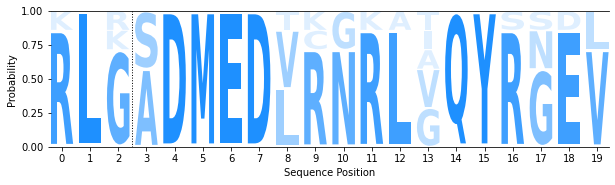

In [9]:
prob_matrix = createProbabilityMatrix(seqs)

# create Logo object
logo = logomaker.Logo(prob_matrix,
                         width=.8,
                         vpad=.05,
                         fade_probabilities=True,
                         stack_order='small_on_top',
                         color_scheme='dodgerblue'
                     )

# style using Logo methods
logo.style_spines(spines=['left', 'right'], visible=False)

# style using Axes methods
logo.ax.set_xticks(range(len(prob_matrix)))
logo.ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_xlabel('Sequence Position')
logo.ax.set_ylabel('Probability')